In [2]:
# todo 캐글러를 대상으로 한 설문조사

# 노트북에 그래프 표현을 위해
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\82105\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\82105\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\82105\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\82105\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [4]:
question.head() #상위 5개 

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
question.tail() #하위 5개 

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [6]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)
mcq.shape

(16716, 228)

In [7]:
mcq.columns # 228개

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [8]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

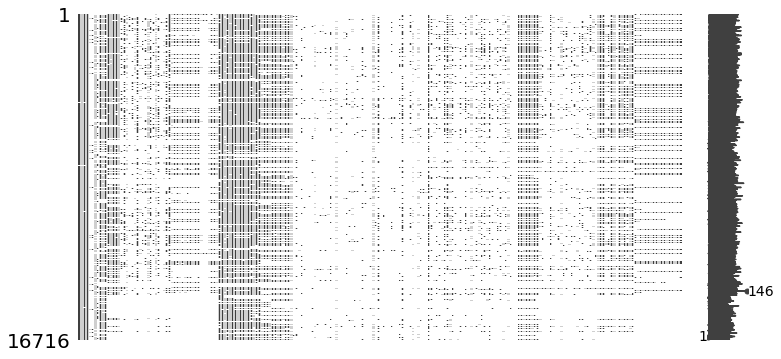

In [9]:
# missingno는 nan 데이터들에 대해 시각화
import missingno as msno
msno.matrix(mcq,figsize=(12,6))

설문통계

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

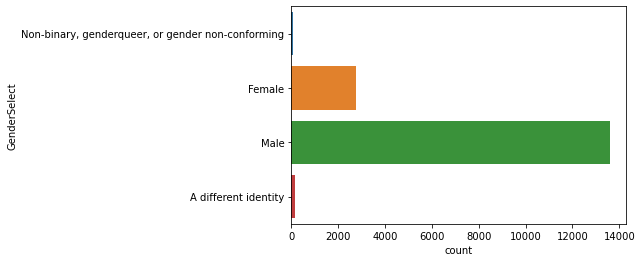

In [10]:
# 성별
sns.countplot(y='GenderSelect',data=mcq)

In [14]:
print(mcq['Country'])
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# 'country' 컬럼을 인덱스로 지정
print(con_df.index)
con_df['국가'] = con_df.index
#컬럼의 순서대로 응답 수, 국가로, 컬럼명을 지정함
con_df.columns = ['응답 수', '국가']
#index 컬럼을 삭제하고 순위를 알기위해 reset_index 수행
con_df = con_df.reset_index().drop('index',axis=1)
con_df.head(20)


0                  NaN
1        United States
2               Canada
3        United States
4               Taiwan
             ...      
16711            Other
16712        Indonesia
16713           Taiwan
16714        Singapore
16715            Japan
Name: Country, Length: 16716, dtype: object
Index(['United States', 'India', 'Other', 'Russia', 'United Kingdom',
       'People 's Republic of China', 'Brazil', 'Germany', 'France', 'Canada',
       'Australia', 'Spain', 'Japan', 'Taiwan', 'Italy', 'Netherlands',
       'Ukraine', 'South Korea', 'Singapore', 'Poland', 'Pakistan', 'Turkey',
       'Indonesia', 'Switzerland', 'South Africa', 'Mexico', 'Colombia',
       'Iran', 'Israel', 'Ireland', 'Portugal', 'Argentina', 'Belgium',
       'Sweden', 'Philippines', 'Greece', 'Malaysia', 'Denmark', 'New Zealand',
       'Nigeria', 'Vietnam', 'Finland', 'Republic of China', 'Egypt',
       'Hungary', 'Hong Kong', 'Romania', 'Kenya', 'Belarus', 'Norway',
       'Czech Republic', 'Chile'],
  

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [15]:
#연령에 대한 정보
mcq['Age'].describe() #describe 정보를 보여줌

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

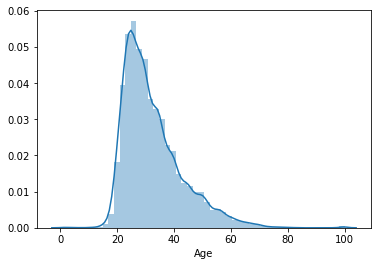

In [21]:
sns.distplot(mcq[mcq['Age'] > 0] ['Age'])

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

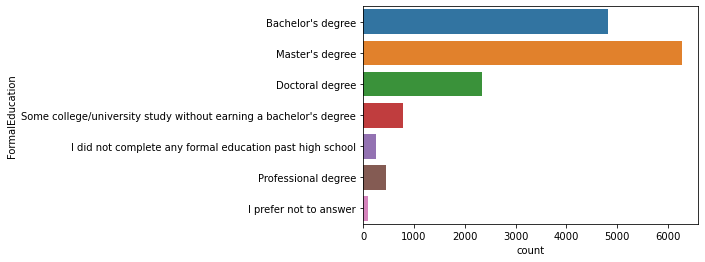

In [22]:
#학력
sns.countplot(y='FormalEducation',data=mcq)

In [31]:
#value_counts 를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize =True 옵션을 사용하면,
# 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있음.
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
# print(mcq_major_count)
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
# print(mcq_major_percent)
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent,left_index=True,right_index = True)
# mcq_major_df.columns
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

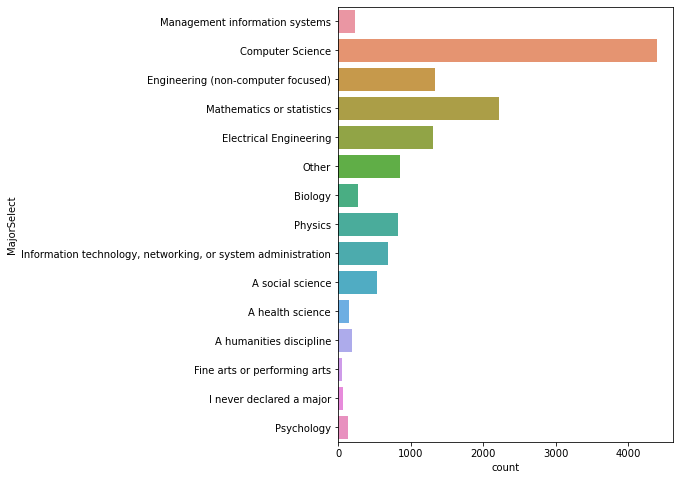

In [32]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect',data=mcq)

In [34]:
#취업여부
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent,left_index=True,right_index = True)
mcq_es_df.columns =['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

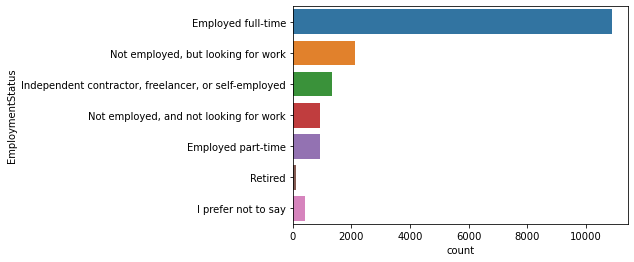

In [35]:
# 취업여부 시각화
sns.countplot(y='EmploymentStatus',data=mcq)

<AxesSubplot:xlabel='count', ylabel='Tenure'>

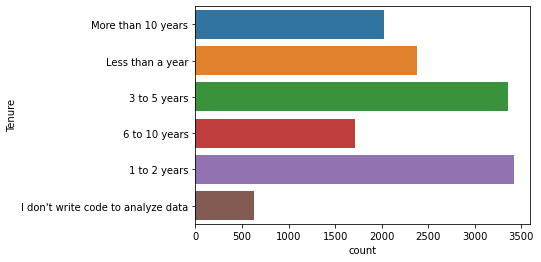

In [36]:
# 프로그래밍 경험
sns.countplot(y='Tenure',data=mcq)

The number of interviewees in Korea: 194


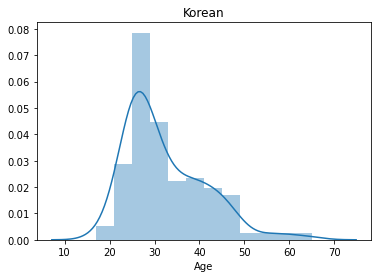

In [37]:
#대한민국
korea = mcq.loc[(mcq['Country'] =='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()


In [38]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


<AxesSubplot:xlabel='GenderSelect', ylabel='count'>

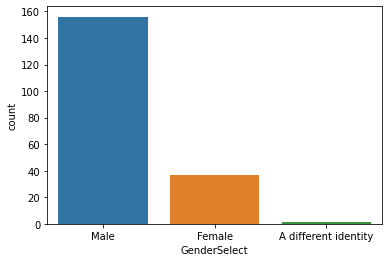

In [39]:
sns.countplot(x='GenderSelect',data=korea)

Text(0.5, 1.0, 'Korean Male')

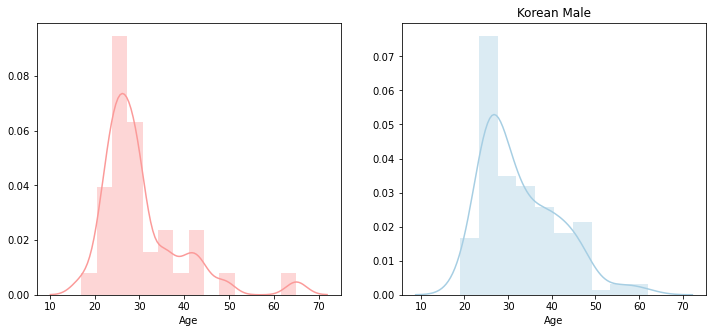

In [46]:
figure,(ax1,ax2) = plt.subplots(ncols =2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(),
            norm_hist=False,color=sns.color_palette('Paired')[4],ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(),
            norm_hist=False,color=sns.color_palette('Paired')[0],ax=ax2)
plt.title('Korean Male')


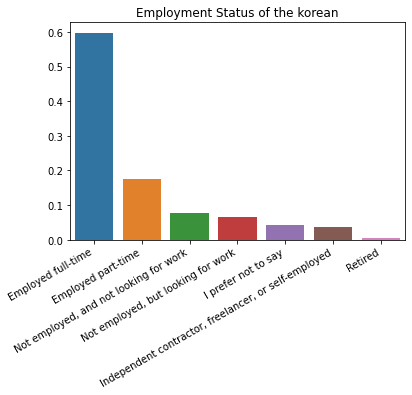

In [56]:
sns.barplot(x=korea['EmploymentStatus'].unique(),y=korea['EmploymentStatus'].value_counts()/len(korea))
# print(korea['EmploymentStatus'].unique())
# print(korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30,ha='right')
plt.title('Employment Status of the korean')
plt.ylabel('')
plt.show()

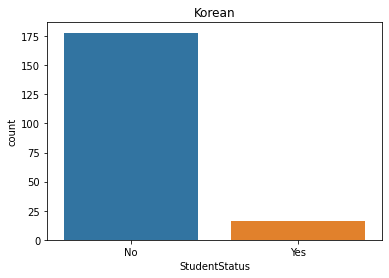

In [57]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus',data=korea)
plt.title('Korean')
plt.show()